In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve
import itertools

In [12]:
data = pd.read_csv(r'/content/dataset_B_05_2020 (1).csv')
x = data.drop(columns=['url', 'status']).values
y = data.iloc[:, -1].values
x

array([[ 37.,  19.,   0., ...,   1.,   1.,   4.],
       [ 77.,  23.,   1., ...,   0.,   1.,   2.],
       [126.,  50.,   1., ...,   0.,   1.,   0.],
       ...,
       [105.,  16.,   1., ...,   0.,   1.,  10.],
       [ 38.,  30.,   0., ...,   0.,   0.,   4.],
       [477.,  14.,   1., ...,   1.,   1.,   0.]])

legitimate    5715
phishing      5715
Name: status, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


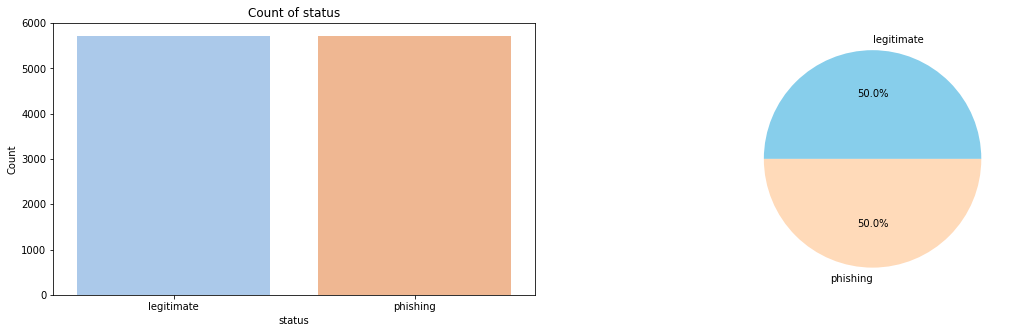

In [7]:
print(data["status"].value_counts())
fig, ax = plt.subplots(1,2, figsize=(19, 5))
g1 = sns.countplot(data.status,ax=ax[0],palette="pastel");
g1.set_title("Count of status")
g1.set_ylabel("Count")
g1.set_xlabel("status")
g2 = plt.pie(data["status"].value_counts().values,explode=[0,0],labels=data.status.value_counts().index, autopct='%1.1f%%',colors=['SkyBlue','PeachPuff'])
fig.show()

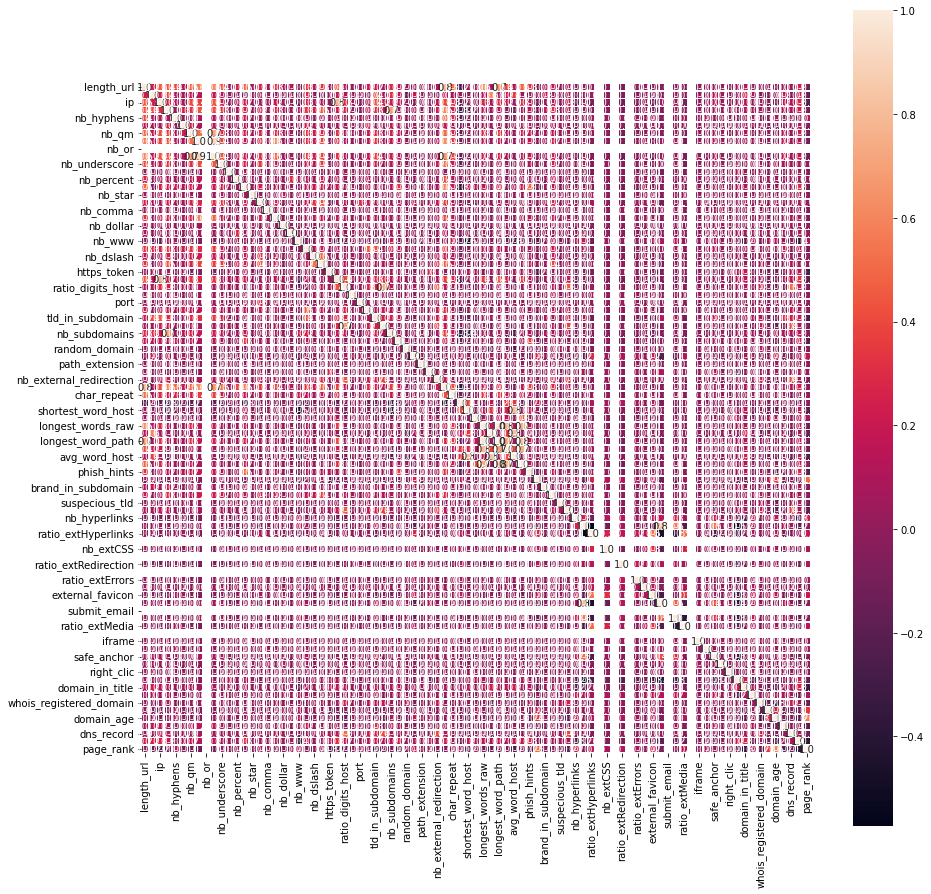

In [8]:
Corr= data.corr()

f,ax=plt.subplots(figsize=(15,15))
sns.heatmap(Corr,annot=True,linewidths=0.5,fmt=".1f",ax=ax,square=True)
plt.show()

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2)

In [15]:
#SVM MODEL

model_svm = SVC(random_state=1)
model_svm.fit(x_train, y_train)
y_pred_svm = model_svm.predict(x_test)
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

  legitimate       0.73      0.29      0.42      1747
    phishing       0.55      0.88      0.68      1682

    accuracy                           0.58      3429
   macro avg       0.64      0.59      0.55      3429
weighted avg       0.64      0.58      0.54      3429



0.5835520559930009

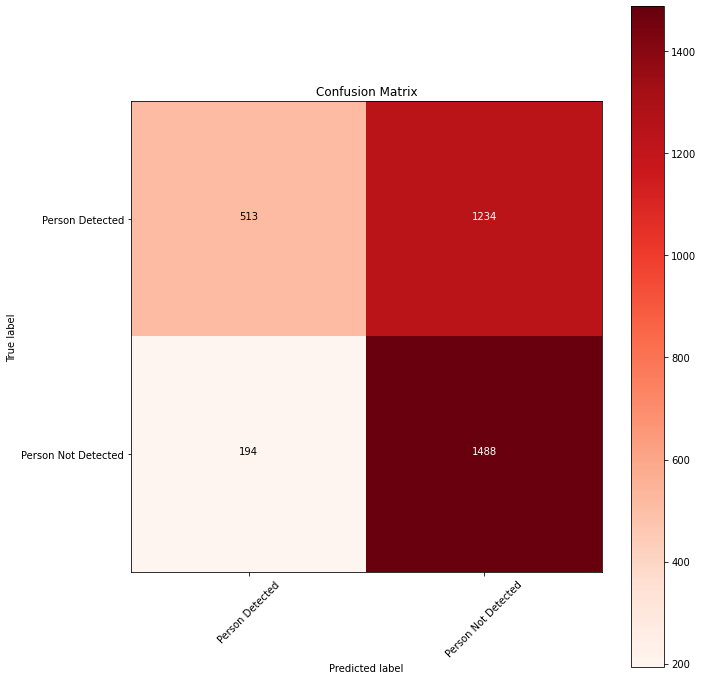

In [16]:
#===========================CONSTRUCTING THE CONFUSION MATRIX=============================#
def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Reds):
    
    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)] = 0.0
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
cm = confusion_matrix(y_test, y_pred_svm)
target_names = ["Person Detected", "Person Not Detected"]
plot_confusion_matrix(cm, target_names, normalize=False, title='Confusion Matrix')
accuracy_score(y_test, y_pred_svm)


In [17]:
# plot for SVM
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_pred_svm)
print('roc_auc_score for SVM: ', roc_auc_score(y_test, y_pred_svm))

plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - SVM')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

ValueError: ignored

In [18]:
#KNN model

model_KNN = KNeighborsClassifier()
model_KNN.fit(x_train, y_train)
y_pred_KNN = model_KNN.predict(x_test)
print(classification_report(y_test, y_pred_KNN))

              precision    recall  f1-score   support

  legitimate       0.86      0.81      0.83      1747
    phishing       0.81      0.86      0.84      1682

    accuracy                           0.83      3429
   macro avg       0.84      0.83      0.83      3429
weighted avg       0.84      0.83      0.83      3429



0.8343540390784485

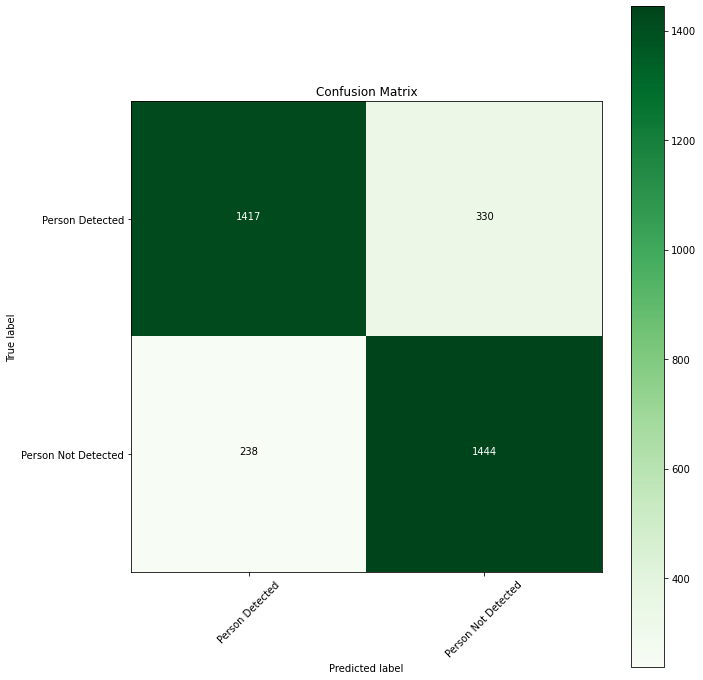

In [19]:
#===========================CONSTRUCTING THE CONFUSION MATRIX=============================#
def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Greens):
    
    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)] = 0.0
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
cm = confusion_matrix(y_test, y_pred_KNN)
target_names = ["Person Detected", "Person Not Detected"]
plot_confusion_matrix(cm, target_names, normalize=False, title='Confusion Matrix')
accuracy_score(y_test, y_pred_KNN)
